In [1]:
# Import the required libraries and read the data sets
import pandas as pd
data = pd.read_csv("/Users/zhaozihao/Desktop/Dataset_book/Train_new.csv")

In [2]:
# import relevant libraries
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# select the feature element
corrmat = data.corr()
cols = corrmat.nlargest(4, 'average_rating')['average_rating'].index
print(cols)

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count'], dtype='object')


In [4]:
cm = np.corrcoef(data[cols].values.T)
print(cm)

[[1.         0.14677551 0.03833919 0.03351912]
 [0.14677551 1.         0.03614673 0.03886408]
 [0.03833919 0.03614673 1.         0.86823084]
 [0.03351912 0.03886408 0.86823084 1.        ]]


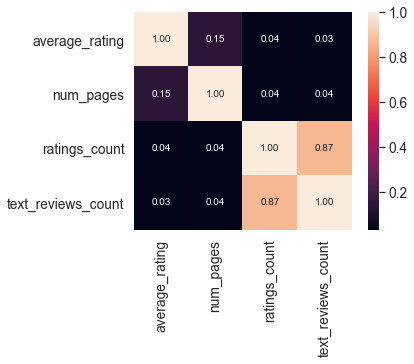

In [5]:
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [6]:
# value counts about feature 'year'
data.year.value_counts()

2006    1523
2005    1131
2004     968
2003     826
2002     741
        ... 
1948       1
1940       1
1900       1
1947       1
1928       1
Name: year, Length: 85, dtype: int64

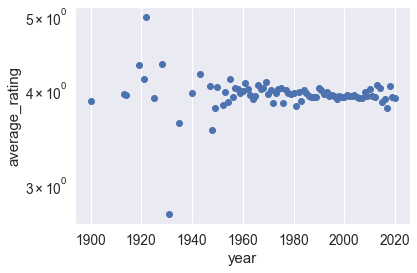

In [7]:
# Grouped by year and aggregated by means of quantities
df=data.groupby('year').aggregate(np.mean)  
# Get all year information
years=df.index.values  
counts=df['average_rating'].values
# Linear fitting data
poly=np.polyfit(years,np.log(counts),deg=1) 
# Settings
plt.xlabel('year',fontsize=15)
plt.ylabel('average_rating',fontsize=15)
plt.semilogy(years,counts,'o')
plt.show()